# Mount dataset resources

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
%cd '/content/drive/MyDrive/github/eda_examples/eda-with-categorical-variables/'
%pwd

/content/drive/MyDrive/github/eda_examples/eda-with-categorical-variables


'/content/drive/MyDrive/github/eda_examples/eda-with-categorical-variables'

# EDA with Categorical Variables

Независимо от того, является ли EDA (исследовательский анализ данных) основной целью вашего проекта или в основном используется для выбора функций / разработки функций в контексте машинного обучения, важно понимать взаимосвязь между вашими функциями и целевой переменной.

Многие примеры EDA подчеркивают числовые функции, но этот ноутбук подчеркивает категориальные функции.


In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

In [48]:
# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## The Dataset

[Titanic dataset](https://www.kaggle.com/c/titanic/data) 
Цель: предсказание возможности выжить определенной персоны - пассажира Титаника

Датасет содержит след.колонки:

| Variable | Definition | Key |
| -------- | ---------- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | # of siblings / spouses aboard the Titanic | |
| parch | # of parents / children aboard the Titanic | |
| ticket | Ticket number | |
| fare | Passenger fare | |
| cabin | Cabin number | |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


In [ ]:
df = pd.read_csv("../datasets/titanic.csv")

# PassengerId is a dataset artifact, not something useful for analysis
df.drop("PassengerId", axis=1, inplace=True)

# We want to use Age as one of the main examples, drop rows that are missing Age values
df.dropna(subset=["Age"], inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Numeric vs. Categorical EDA

Здесь мы пытаемся увидеть взаимосвязь между данным числовым признаком (numeric feature) и целевым, который является категориальной. В качестве примера возьмем столбец `Age`.

### What Not to Do

Мы могли бы подумать, что просто использовать диаграмму рассеяния, поскольку категориальная цель уже закодирована как 0 и 1:


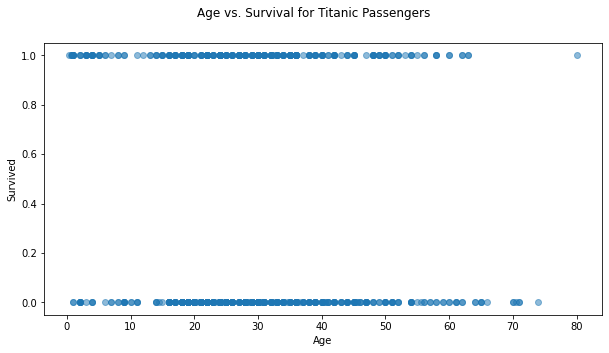

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df["Age"], df["Survived"], alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Survived")

fig.suptitle("Age vs. Survival for Titanic Passengers");

Хорошо, мы видим, что `age` имеет некоторое значение, но довольно сложно извлечь много полезной информации из этой визуализации. Давайте попробуем другие визуализации, которые расскажут нам больше


### Multiple Histograms

Вместо того, чтобы использовать ось Y для представления двух категорий, давайте использовать два разных цвета. Это означает, что мы можем использовать ось y для представления количества, а не пытаться отличить эту информацию от плотности точек.


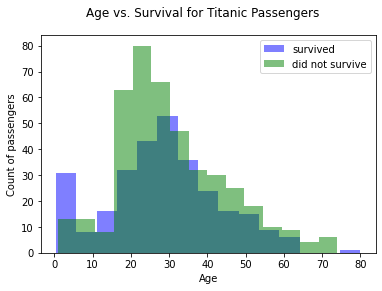

In [ ]:
fig, ax = plt.subplots()

ax.hist(df[df["Survived"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="survived")
ax.hist(df[df["Survived"]==0]["Age"], bins=15, alpha=0.5, color="green", label="did not survive")

ax.set_xlabel("Age")
ax.set_ylabel("Count of passengers")

fig.suptitle("Age vs. Survival for Titanic Passengers")

ax.legend();

### Multiple Density Estimate Plots

Это показывает в основном ту же информацию, что и гистограммы, за исключением того, что это оценка плотности (оценка функции плотности вероятности), а не подсчет по ячейкам. В Seaborn есть отличные встроенные функции для этого.


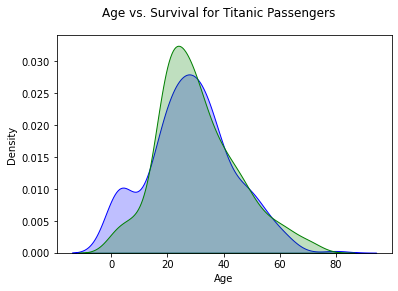

In [ ]:
fig, ax = plt.subplots()

sns.kdeplot(df[df["Survived"]==1]["Age"], shade=True, color="blue", label="survived", ax=ax)
sns.kdeplot(df[df["Survived"]==0]["Age"], shade=True, color="green", label="did not survive", ax=ax)

ax.set_xlabel("Age")
ax.set_ylabel("Density")

fig.suptitle("Age vs. Survival for Titanic Passengers");

### Multiple Box Plots

Здесь мы теряем часть информации о распределении в целом, чтобы сосредоточиться на конкретной сводной статистике распределения.

<a title="Dcbmariano / CC BY-SA (https://creativecommons.org/licenses/by-sa/4.0)" href="https://commons.wikimedia.org/wiki/File:Box_plot_description.jpg"><img width="256" alt="Box plot description" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Box_plot_description.jpg"></a>



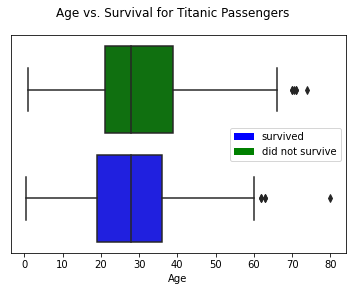

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Survived", data=df, orient="h", palette={1:"blue", 0:"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Survival for Titanic Passengers")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches);

## Categorical vs. Categorical EDA

Здесь мы пытаемся увидеть взаимосвязь между данной категориальной переменной и целью (которая также является категориальной). В качестве примера воспользуемся признаком `Pclass`(класс пассажира).


### What Not to Do

`Pclass`(класс пассажира) также закодирован ввиде числа - используем тот же график

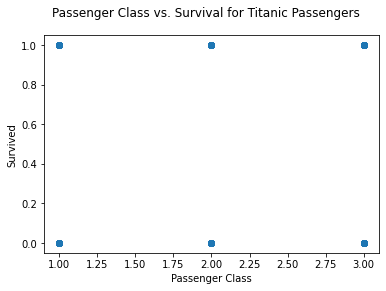

In [ ]:
fig, ax = plt.subplots()

ax.scatter(df["Pclass"], df["Survived"], alpha=0.5)

ax.set_xlabel("Passenger Class")
ax.set_ylabel("Survived")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

... но этот график вообще бесполезен. На самом деле это просто говорит нам о том, что по крайней мере 1 человек попадает в каждую категорию.

### Grouped Bar Charts

Показывает распределение по категориям, как в примере с «множественными гистограммами» для числовых и категориальных.

In [ ]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


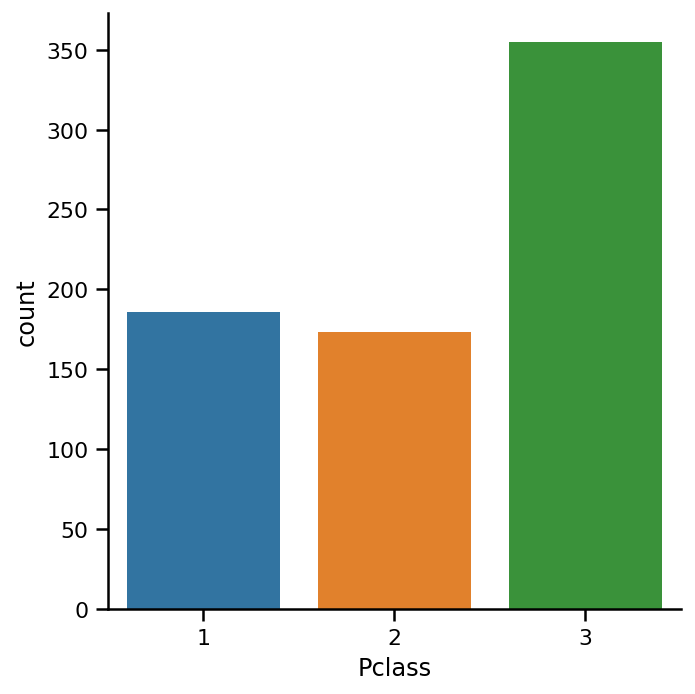

In [ ]:
fig, ax = plt.subplots()
sns.catplot(x='Pclass', data=df, kind='count');
plt.close(1) # catplot creates an extra figure we don't need

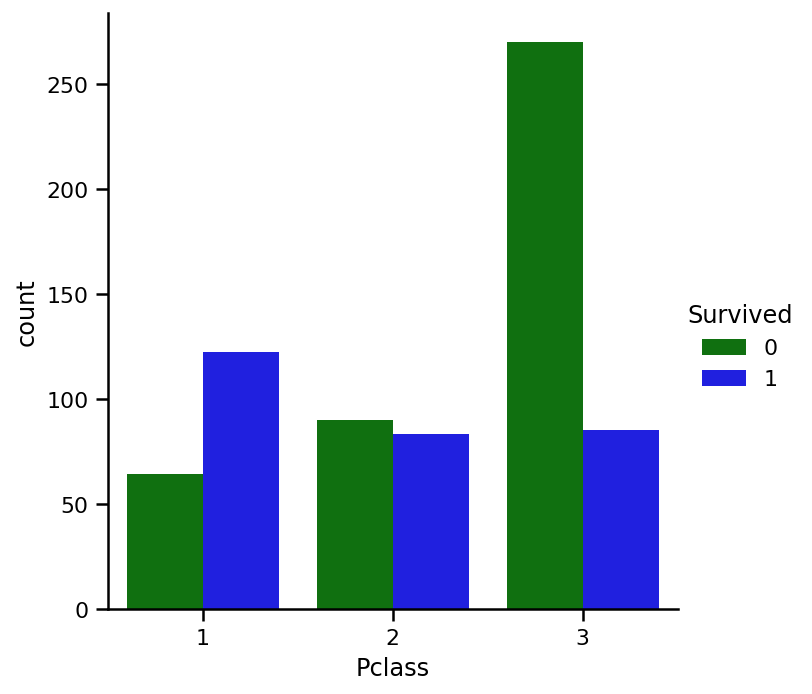

In [ ]:
fig, ax = plt.subplots()

sns.catplot(x="Pclass", hue="Survived", data=df, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.set_xlabel("Passenger Class")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

[seaborn.catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)


No handles with labels found to put in legend.


[Text(0, 0, 'did not survive'), Text(0, 0, 'survived')]

Text(0.5, 0, '')

Text(0.5, 0.98, 'Passenger Class vs. Survival for Titanic Passengers')

['1', '2', '3']


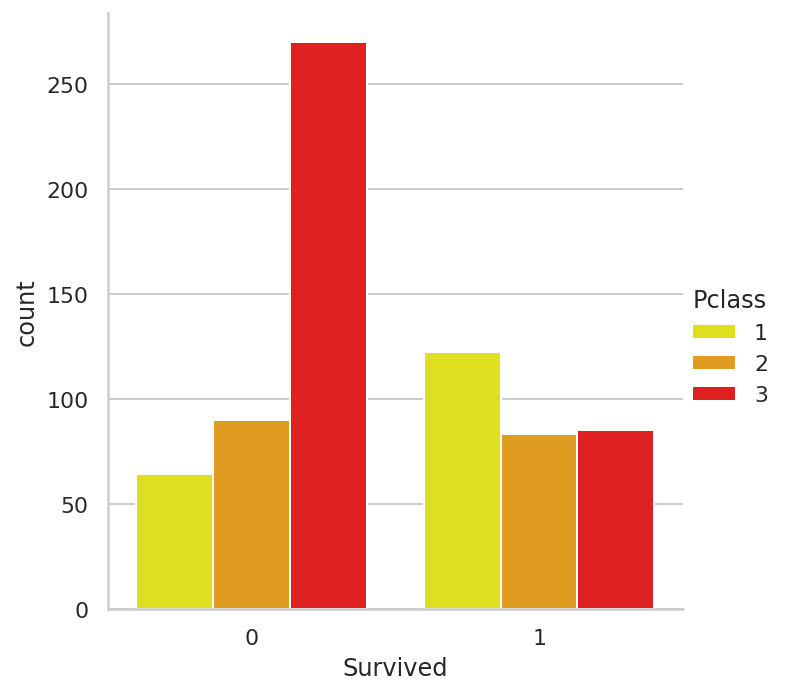

In [ ]:
fig, ax = plt.subplots()

g2 = sns.catplot("Survived", hue="Pclass", data=df, kind="count", 
            palette={1:"yellow", 2:"orange", 3:"red"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="PClass")  # No handles with labels found to put in legend.
ax.set_xticklabels(["did not survive", "survived"])
ax.set_xlabel("")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

handles2,labels2 = g2.axes.flat[0].get_legend_handles_labels()
print(labels2)

### Stacked Bar Charts

These can be used for counts (same as grouped bar charts) but if you use percentages rather than counts, they show proportions

In [ ]:
df[["Pclass", "Survived","Name"]]

,Pclass,Survived,Name
0,3,0,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,3,0,"Allen, Mr. William Henry"
...,...,...,...
885,3,0,"Rice, Mrs. William (Margaret Norton)"
886,2,0,"Montvila, Rev. Juozas"
887,1,1,"Graham, Miss. Margaret Edith"
889,1,1,"Behr, Mr. Karl Howell"


In [ ]:
df.groupby(["Pclass", "Survived"])["Name"].count()

Pclass  Survived
1       0            64
        1           122
2       0            90
        1            83
3       0           270
        1            85
Name: Name, dtype: int64

In [ ]:
# Create a dataframe with the counts by passenger class and survival
counts_df = df.groupby(["Pclass", "Survived"])["Name"].count().unstack()
counts_df

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


In [ ]:
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df

Pclass,1,2,3
Survived,,,
0,0.150943,0.212264,0.636792
1,0.420690,0.286207,0.293103


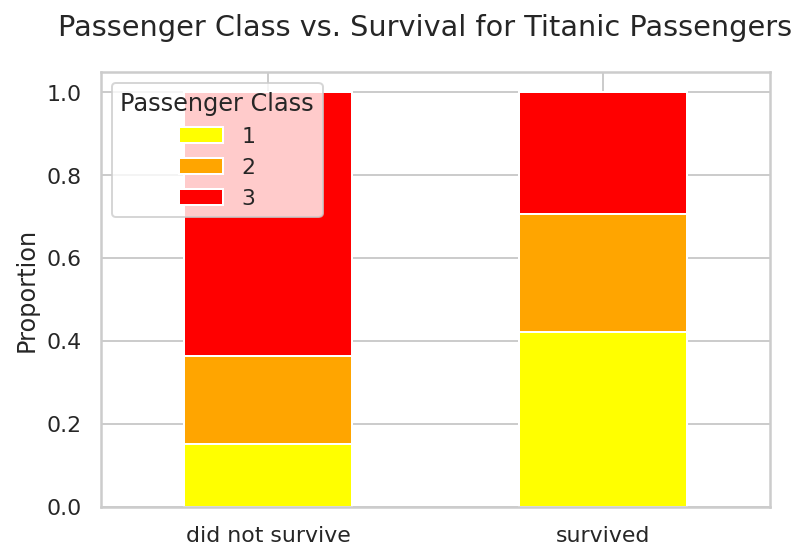

In [ ]:
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red"], ax=ax)

ax.legend(title="Passenger Class")
ax.set_xticklabels(["did not survive", "survived"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

In [ ]:
# Use the same counts df, but now survived + did not survive add up to 1
survived_percents_df = counts_df.T.div(counts_df.T.sum()).T
survived_percents_df

Survived,0,1
Pclass,,
1,0.344086,0.655914
2,0.520231,0.479769
3,0.760563,0.239437


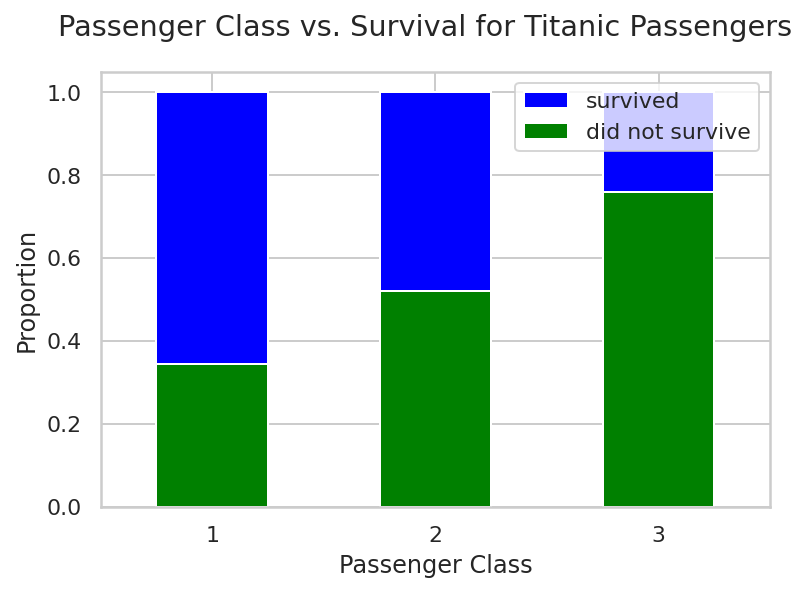

In [ ]:
fig, ax = plt.subplots()

survived_percents_df.plot(kind="bar", stacked=True, color=["green", "blue"], ax=ax)

ax.set_xlabel("Passenger Class")
ax.set_xticklabels([1, 2, 3], rotation=0)
ax.set_ylabel("Proportion")

color_patches = [
    Patch(facecolor="blue", label="survived"),
    Patch(facecolor="green", label="did not survive")
]
ax.legend(handles=color_patches)

fig.suptitle("Passenger Class vs. Survival for Titanic Passengers");

## Numeric vs. Numeric vs. Categorical EDA

Иногда интересно увидеть взаимосвязь между двумя разными числовыми функциями и целью

### What Not to Do

You could just make a scatter plot of the two numeric features

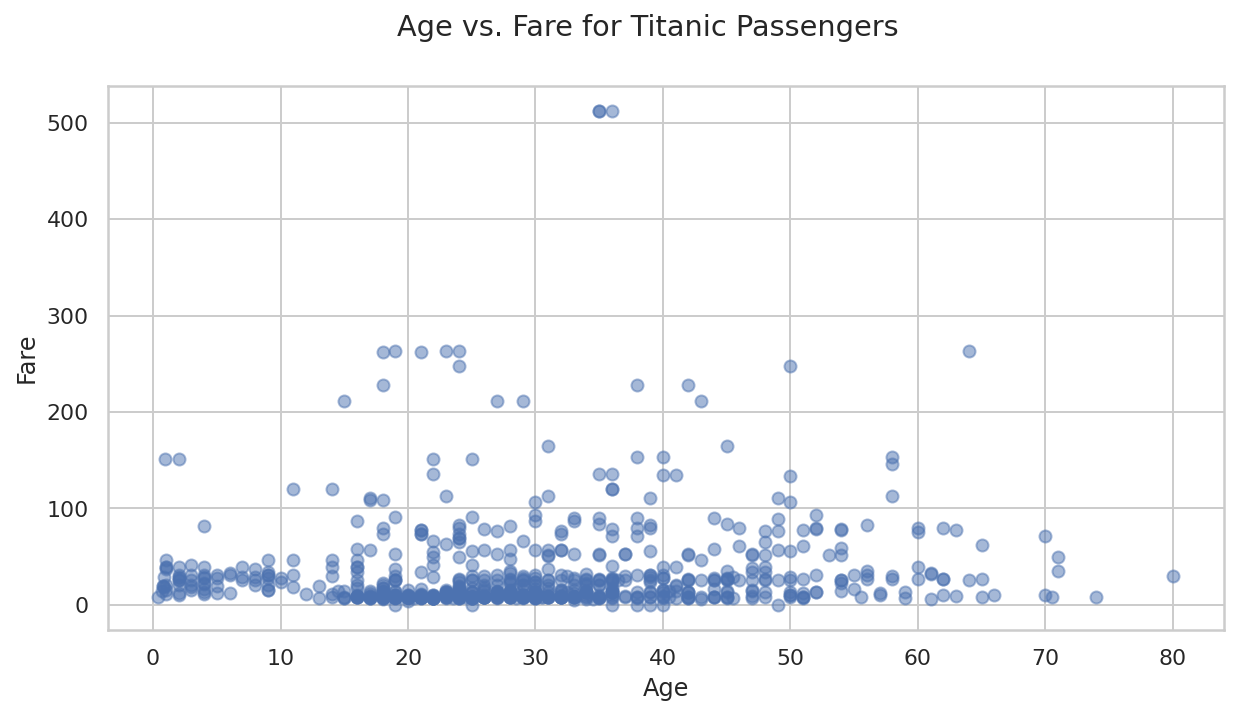

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df["Age"], df["Fare"], alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

fig.suptitle("Age vs. Fare for Titanic Passengers");

Это нормально, если вас интересует взаимосвязь между возрастом и тарифом (Age and Fare), но это не дает вам никакой информации о взаимосвязи между этими функциями и целью.


### Scatterplot with Color to Distinguish Categories

Такой график может помочь вам понять, как эти две функции соотносятся с целью.

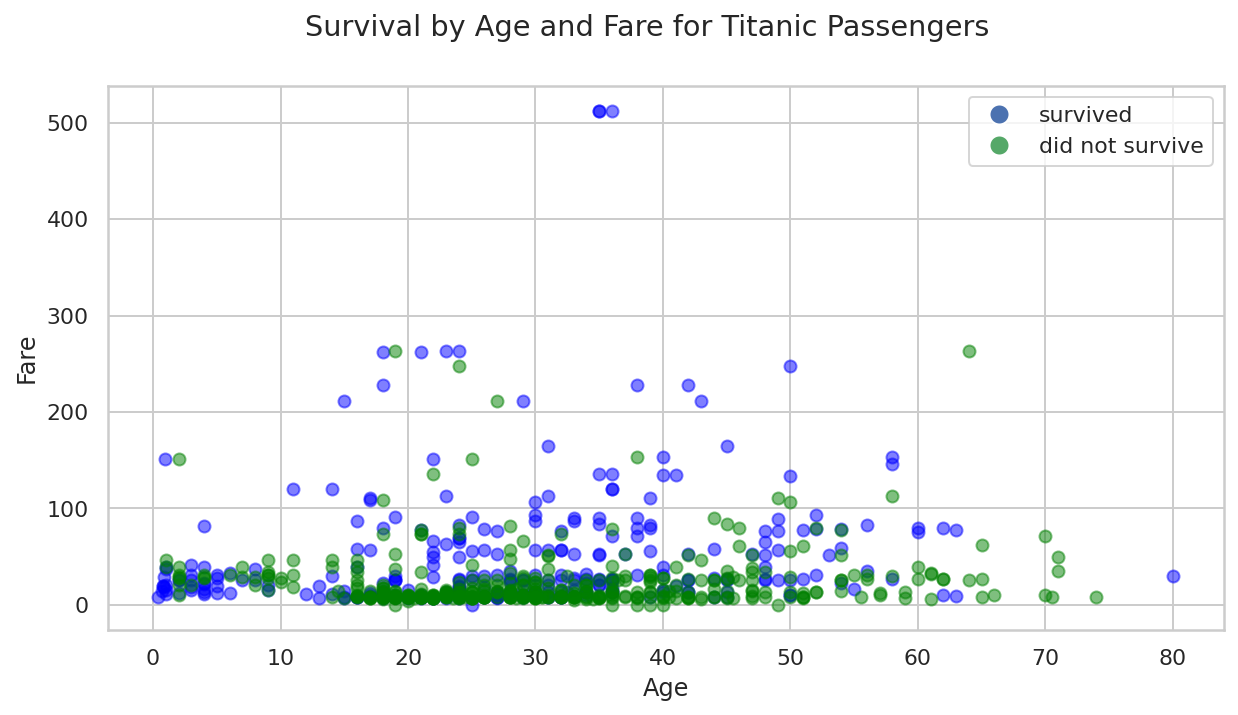

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["Survived"]==1]["Age"], df[df["Survived"]==1]["Fare"], c="blue", alpha=0.5)
ax.scatter(df[df["Survived"]==0]["Age"], df[df["Survived"]==0]["Fare"], c="green", alpha=0.5)

ax.set_xlabel("Age")
ax.set_ylabel("Fare")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='survived', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='did not survive', markerfacecolor='g', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Survival by Age and Fare for Titanic Passengers");

## Summary

Most of the time if your target is a categorical variable, the best EDA visualization isn't going to be a basic scatter plot.  Instead, consider:

#### Numeric vs. Categorical (e.g. `Survived` vs. `Age`)
 - Multiple histograms
 - Multiple density estimate plots
 - Multiple box plots

#### Categorical vs. Categorical (e.g. `Survived` vs. `Pclass`)
 - Grouped bar charts
 - Stacked bar charts

#### Numeric vs. Numeric vs. Categorical (e.g. `Age` vs. `Fare` vs. `Survived`)
 - Color-coded scatter plots

# Exploratory Analysis of the Titanic Dataset

[Текст ссылки](https://jkarakas.github.io/Exploratory-Analysis-of-the-Titanic-Dataset/Titanic_Dataset_Exploratory_Analysis._With_Code.html)

In [56]:
df = pd.read_csv("../datasets/titanic.csv")

n_titanic_data = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked']]
n_titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [57]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


We have only 714 Age values out of 891 of the entries and 2 values missing from the Embarked Variable. We will have to decide whether to omit these or impute them with some values when we model relationships based on Age or Embarked.

Imputing missing data is a complicated procedure and creating and evaluating a regression model to predict them based on the other variables is out of the scope of this analysis.
However, by using the mean or median , we can bias any relationships that we are modeling.[1] [2] .

Therefore we will choose to omit the missing Age and Embarked data whenever we are modeling relationships based on these two variables using the Available-case Analysis[3] method (Where different aspects of the problem are studied with different subsets of the data) and accept the limitations of this approach (Lack of consistency between analyzed subsets).

In [58]:
#Make another copy of the new dataframe
descript = n_titanic_data.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)
#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [59]:
# Make a function to get the composition of the variables per number of passengers    
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)
    
    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))
    
    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    
    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)
    
    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

### Analysis of the Embarked variable.¶
We start with the composition of passengers based on their port of embark

Total No. of Embarked:889


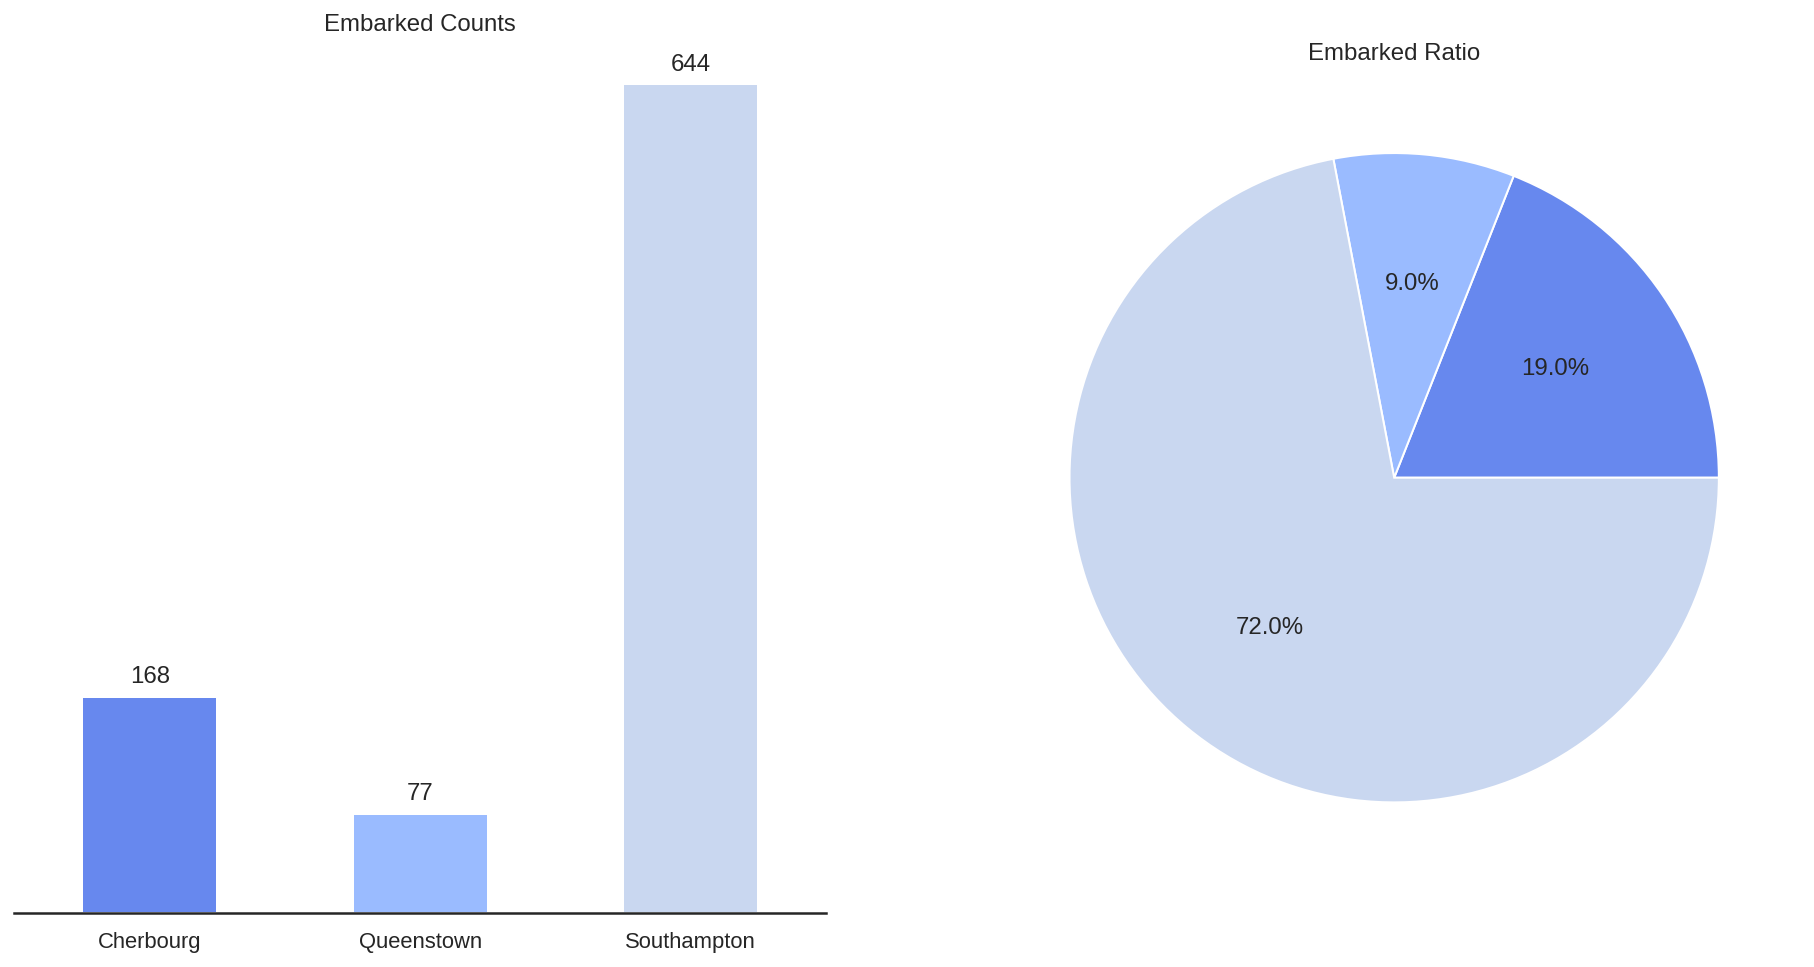

In [60]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

We see that the majority of passengers (644 of 889 - 72%) embarked in Southhampton and only 77 passengers - 9% - embarked in Queenstown

Let's examine the percentages of passengers that survived ,depending on their port of embarkation.

We will make functions for this operation since we will use for the other variables as well:

### Correlation of Survived with Embarked .

In [61]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):     
    grouped = table
    
    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:   
        del grouped['Total']
    except:
        pass
    
    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally
    
    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass     
    # set custom title    
    plt.title(custom_title)
    
def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):   
    
    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)
    
    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)
   
    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)      

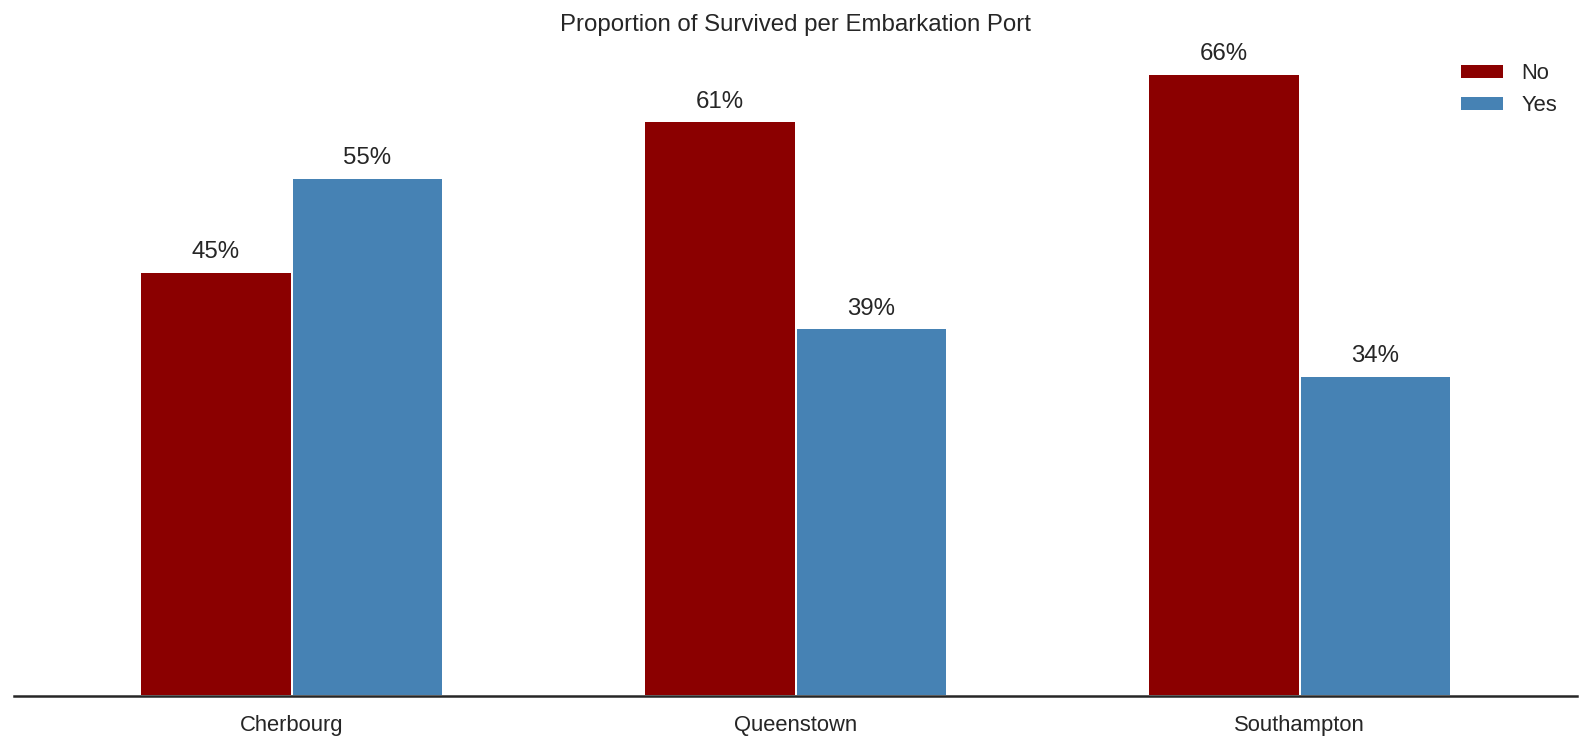

In [62]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')

We see that 55% of passengers embarked in Cherbourg survived compared to 34% and 39% at Southhampton and Queensberg respectively.

This is counter-intuitive at a first look. Investigating deeper into the composition of the passengers regarding their gender and their class may given us more information about this relationship

## Correlation of Embarked with Pclass

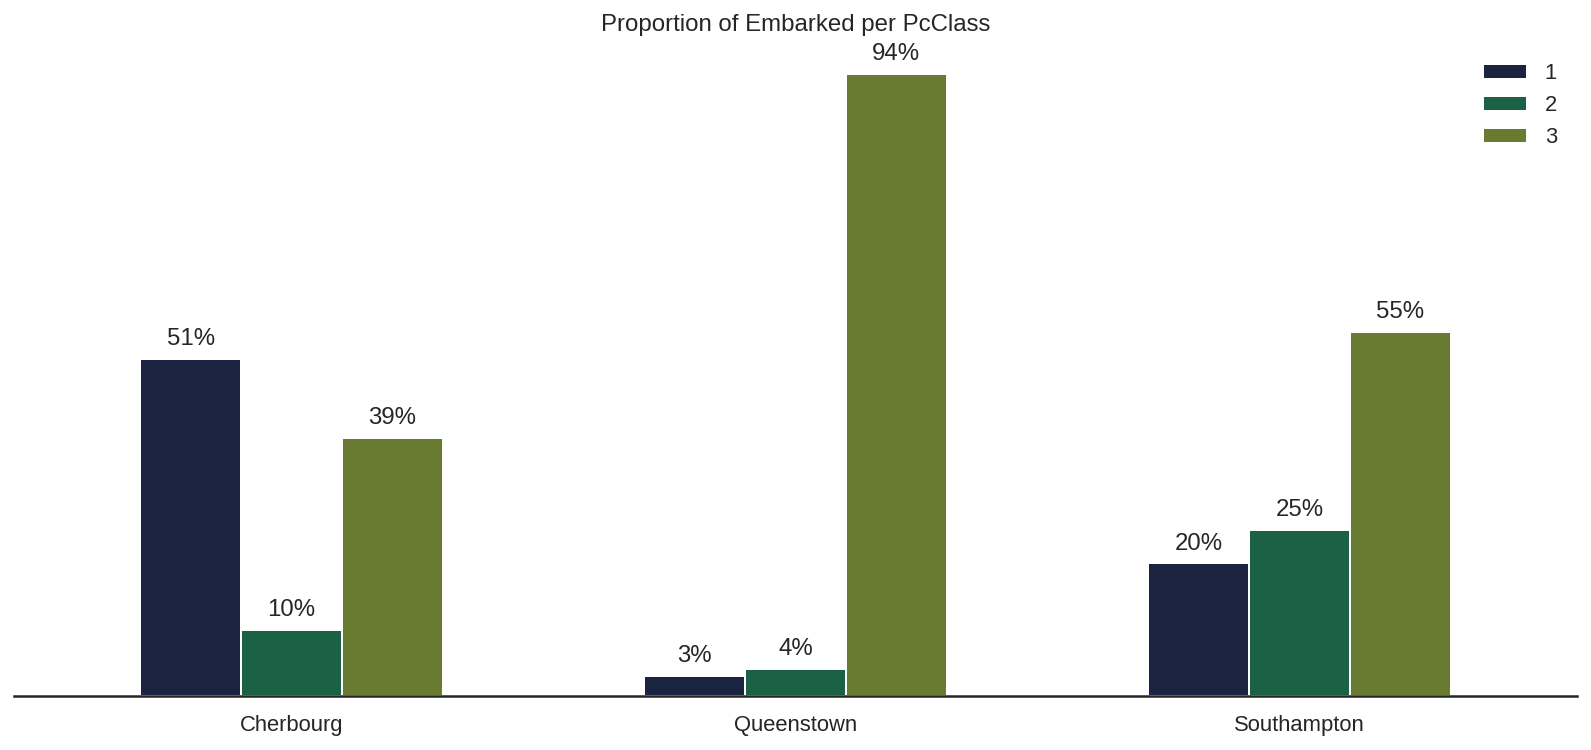

In [63]:
#Calculate percentages of port passengers per Class
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('cubehelix'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])

51% of the passengers embarked in Cherbourg are in the 1st Pclass compared to 20% and 3% respectively for Southhampton and Queenstown.

It looks like the class may play a role in port of embarkation's relationship with survibability.

Let's explore the survivability based on the Pcclass variable further.

## Correlation of Survived with Pclass.

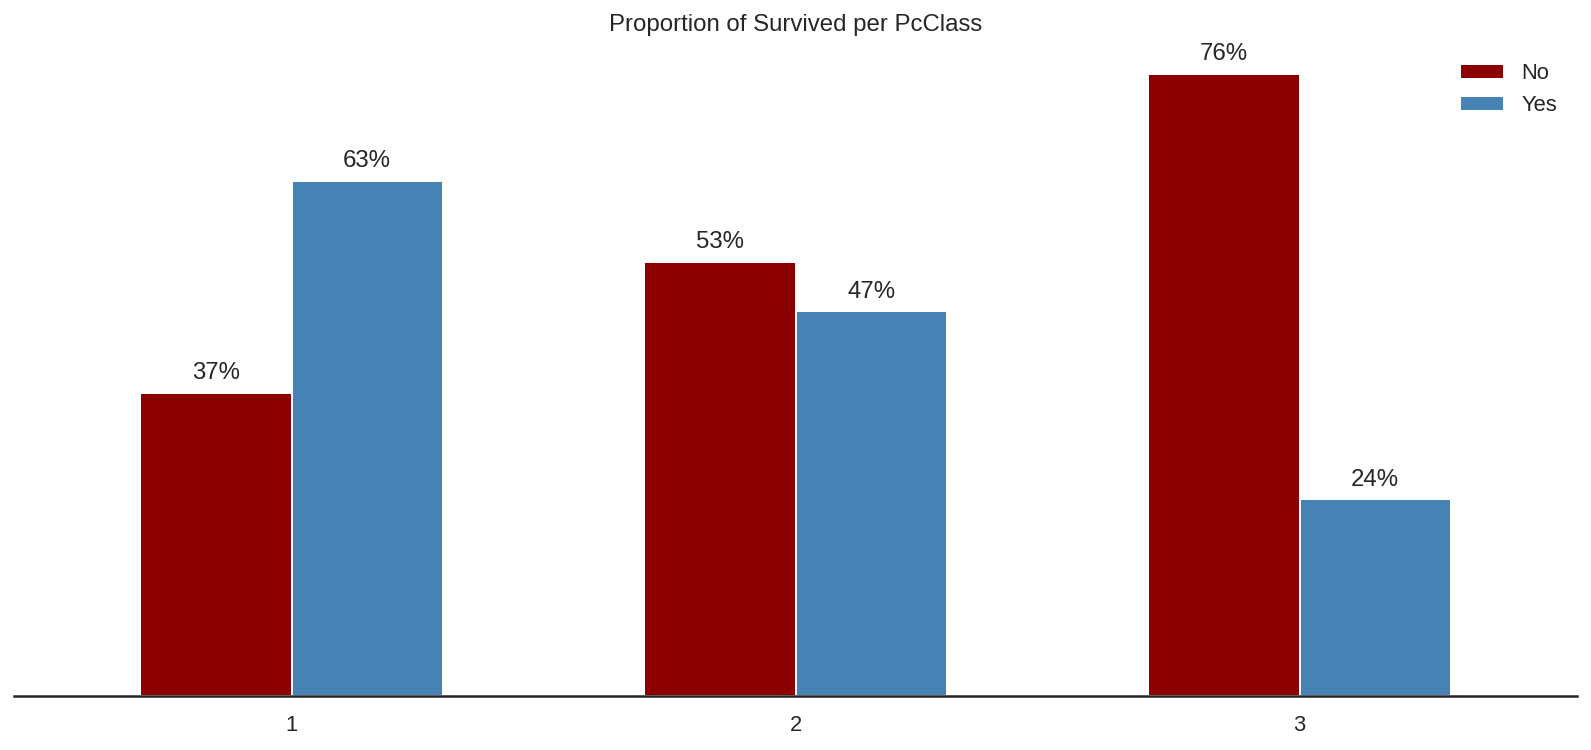

In [64]:
Groupby_TwoCol_Plot(descript,'Pclass', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per PcClass')

63% of 1st class passengers survived compared to 47% and 24% for the 2nd and 3rd class respectively.

Indeed, survivability seems to be correlated with the Pcclass and this could be the main factor behind the correlation with the port of embarkation as well.

Let's investigate Embarked and the correlation with Sex

## Correlation of Embarked with Sex.

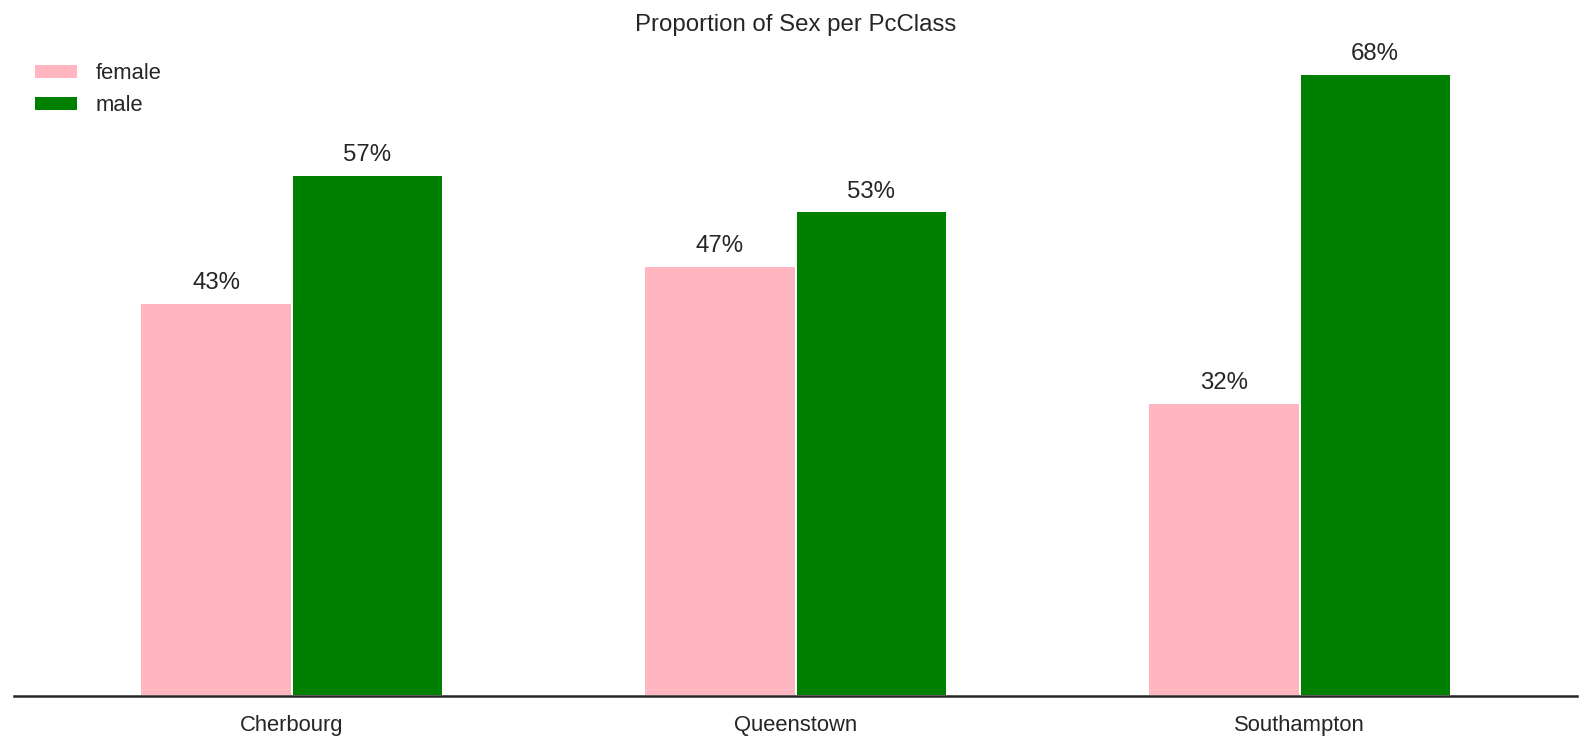

In [65]:
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

There does not seem to be a clear pattern related to Sex that could be contributing to the increased survivability of the Cherbourg passengers.

Let's see the Sex composition of the whole population.

## Analysis of the Sex variable.

Total No. of Sex:891


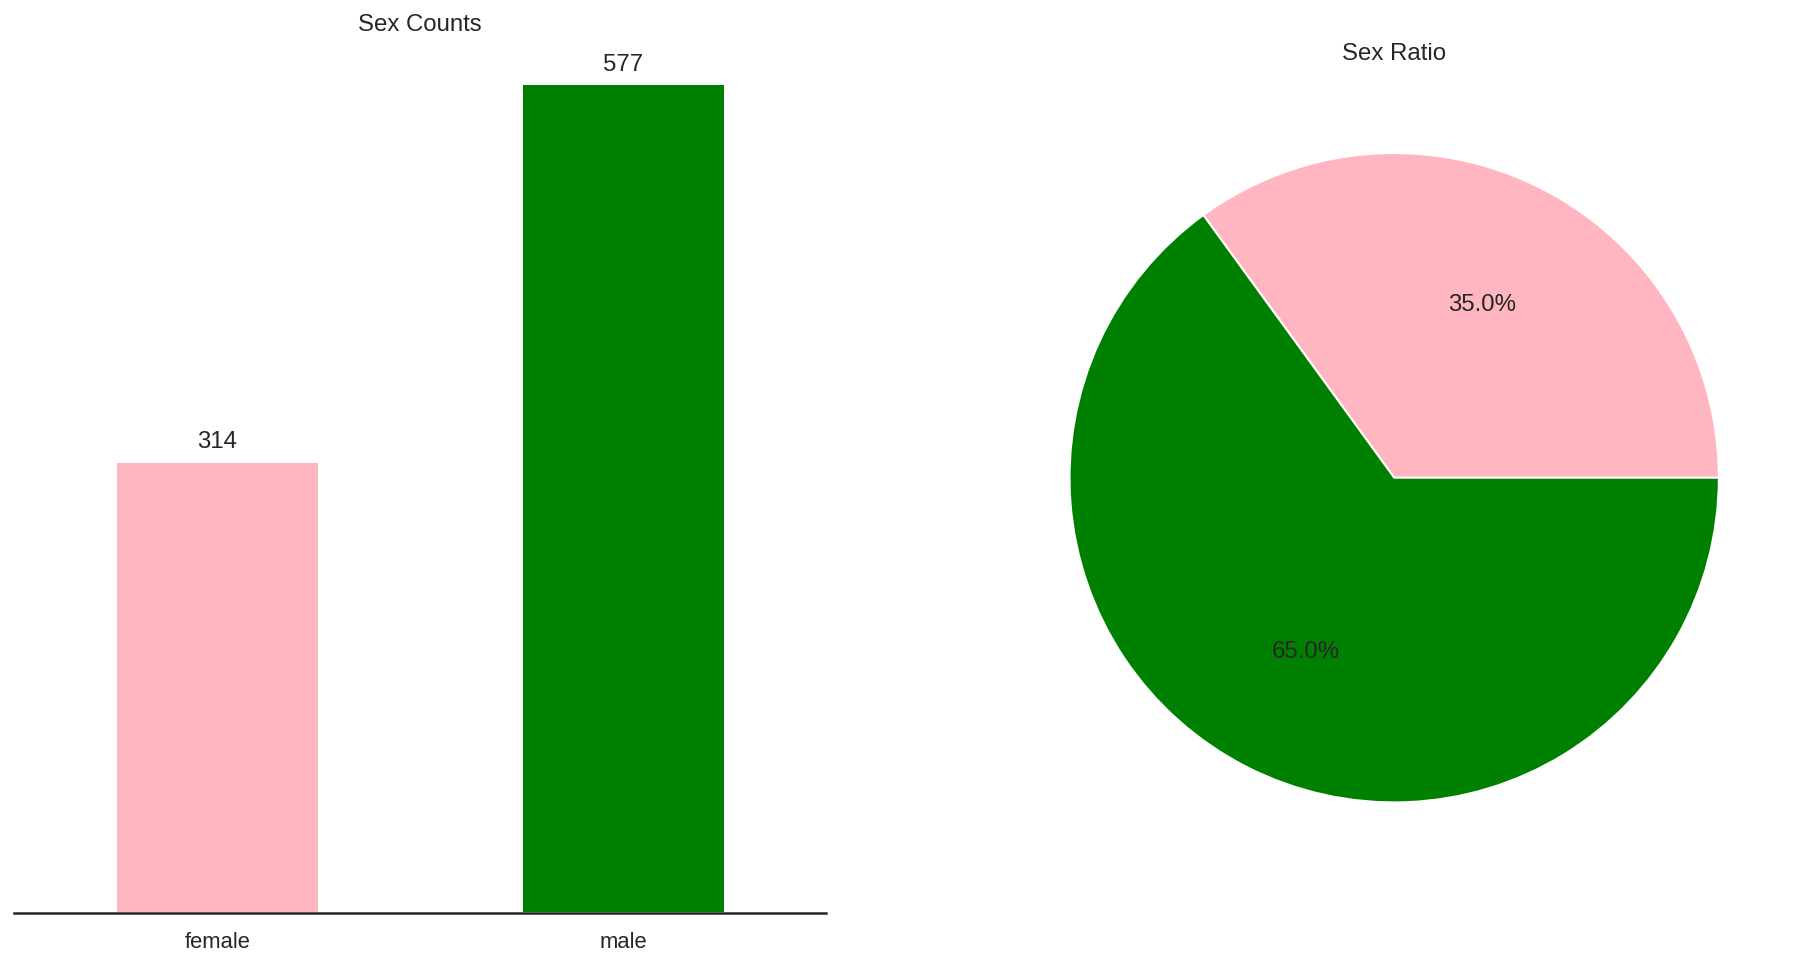

In [66]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('lightpink','green') )

## Correlation of Sex with Pclass.

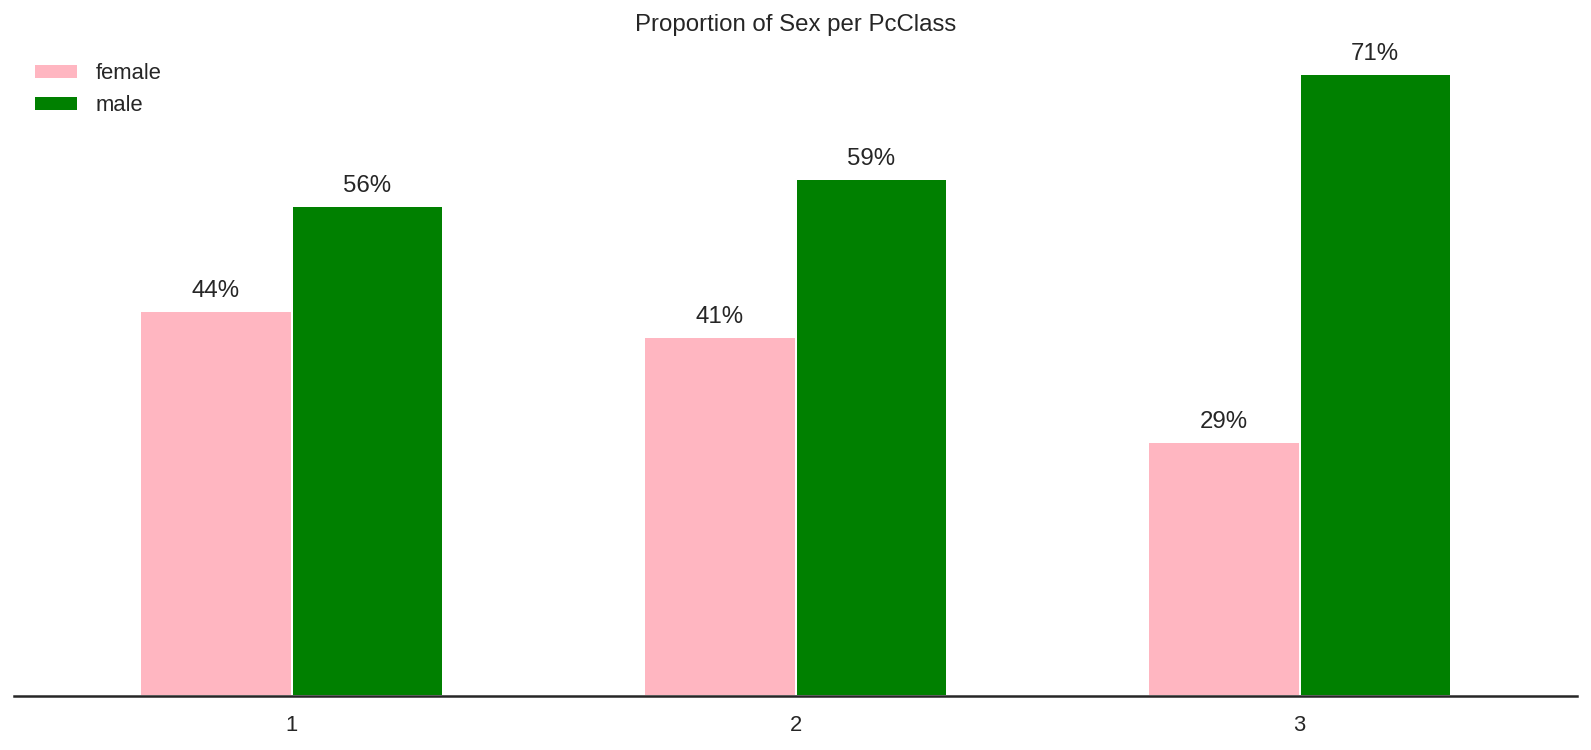

In [67]:
#Calculate percentages of Pclass per Sex
Groupby_TwoCol_Plot(descript,'Pclass', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

We observe that the 3rd class has a higher than average (71 % vs 65%) male percentage.

And the survivability based on Sex

## Correlation of Sex with Survived

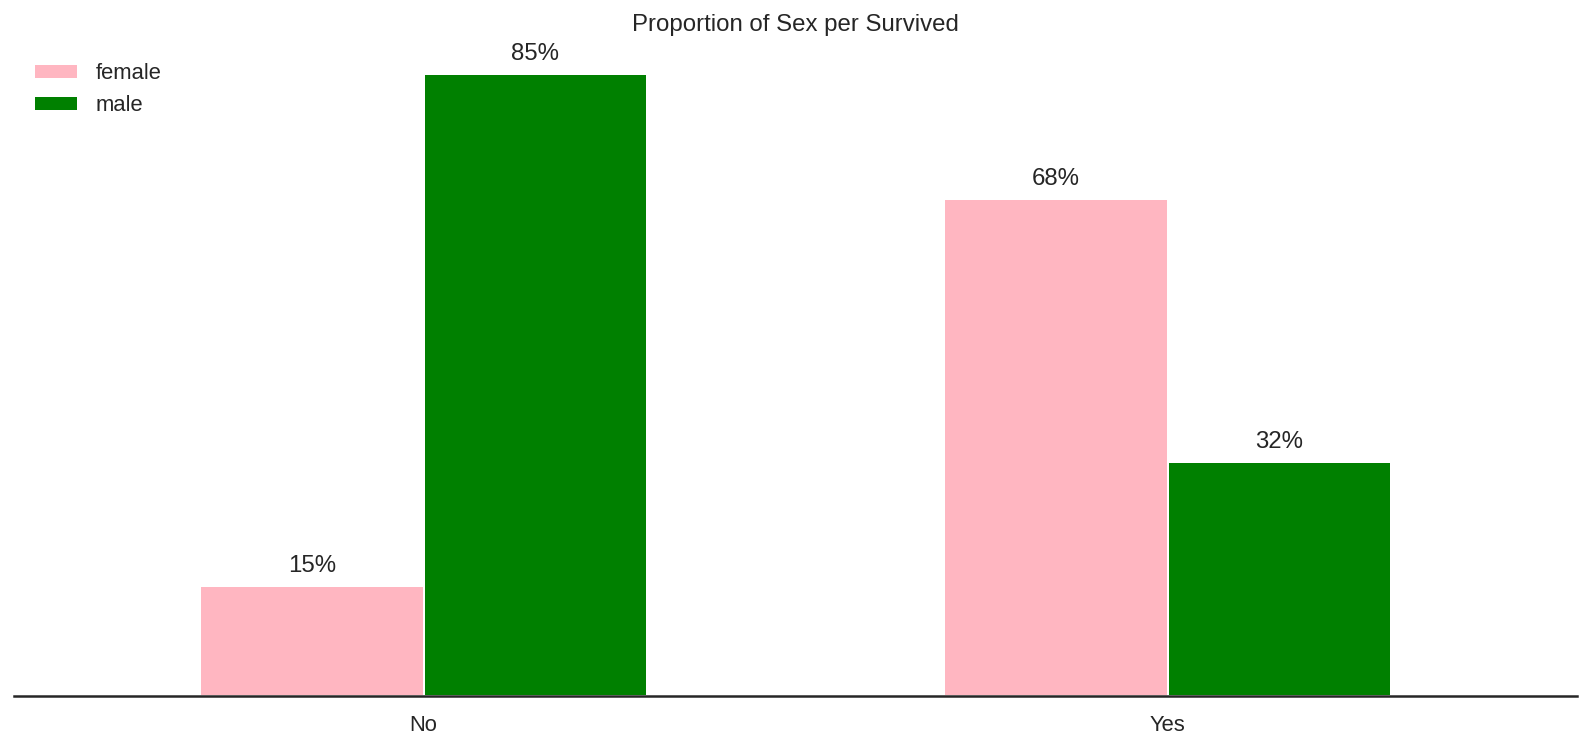

In [68]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper left')

74% of females survived compared to 19% for males. 44% of the 1st class(which had a 65% survivability) comprised of females compared to 29% of the third class (24% survivability).

We can observe this relationship in the following seaborn barplot where the black lines represent confidence intervals built using bootstrapping.

## Correlation of Survived with Sex and Pclass.

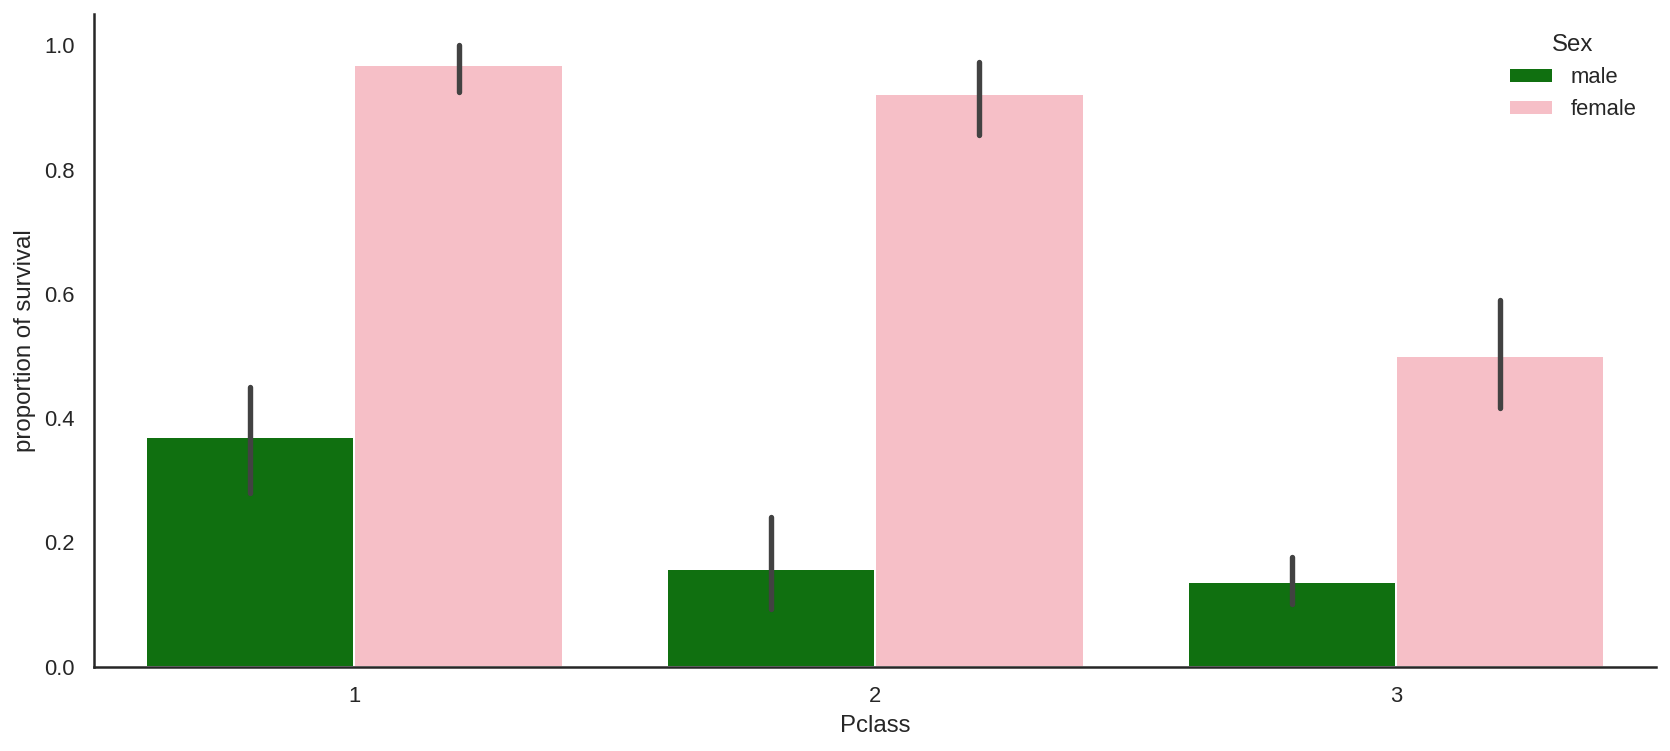

In [69]:
plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('green','lightpink')))
sns.barplot(data=n_titanic_data, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival')
sns.despine(top=True, right=True, left=False, bottom=False);

The proportion of survival for females in the first class was almost 100% in the first class compared to 50% in the third class.

Further statistical tests need to be conducted but it seems that Age together with the Class have a compound effect on survivability as well as on the correlation of other variables to survivability.

## Analysis of the Age variable¶
Let's examine now the age distribution of the passengers and how Age affected their chances of survival.

We will start with a plot of the entire population.

In [70]:
#Make a dataframe for non missing 'Age'values
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())] 

#And replace the survived keys
not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

In [71]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


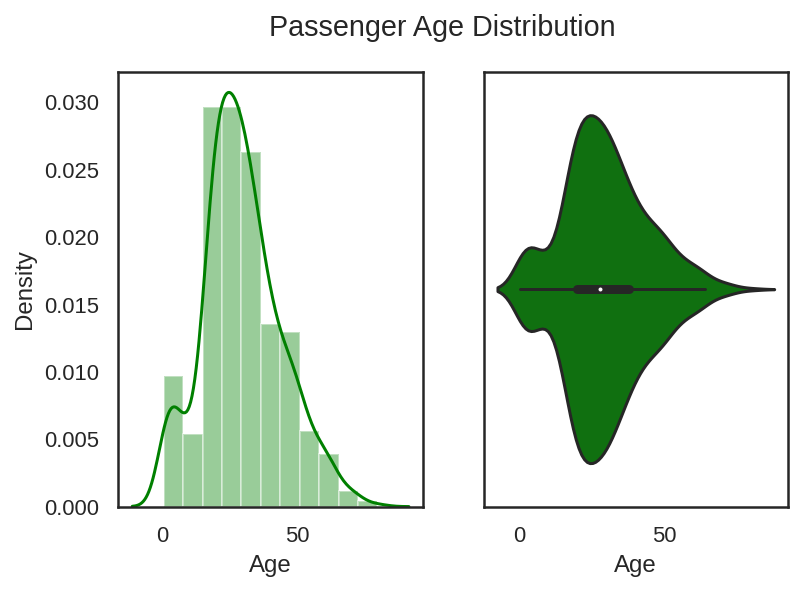

In [72]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [73]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


And the density distribution and boxplot of the Age variable depending by survivability.

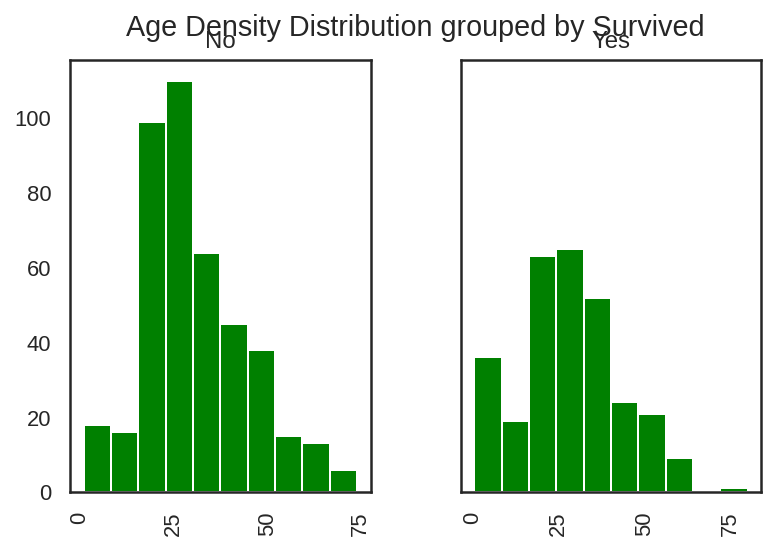

In [75]:
not_missing.hist(column="Age",by="Survived",sharey=True) #,normed=True - AttributeError: 'Rectangle' object has no property 'normed'
plt.suptitle('Age Density Distribution grouped by Survived');

We observe that the percentage of children below 10 that survived was significantly higher and almost nobody over 70 year's old survived. We would like to examine if this was by luck or by some other underlying reason (like the 'Women and Children first' rule).

In [76]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

The not-survived and survived age populations have the following descriptive statistics:

In [77]:
var.loc[:,['Not-survived','Survived']]

,Not-survived,Survived
Sample Size,424.000,290.000
Mean,30.626,28.344
Std. Deviation,14.172,14.951
Min,1.000,0.420
25% Qt,21.000,19.000
Median,28.000,28.000
75% Qt,39.000,36.000
Max,74.000,80.000


### Survived- Age Statistical Chi-SquaredTest
We will conduct a statistical chi-squared test to establish whether the Survived and Age variables are related.

Dependent Variable: Survived
Independent Variable: Age

Oi : the observed value of survived for the given age
Ei : the expected value of survived for the given age

We will test the following hypotheses:

H0 : The Null Hypothesis, that there is no relationship between the Survived and Age variables (independent)  →Oi≠Ei 
HA : The Alternative Hypothesis, that there is a relationship between the Survived and Age variables (dependent)  →Oi=Ei

In [78]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins 
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

In [79]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,24,61,143,94,55,28,13,6
Yes,38,41,77,73,34,20,6,1


We will compute the Pearson's Chi-square statistic based on the above observations table:

In [81]:
from scipy.stats import chi2_contingency

#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:17.42772160585894
dof:7
p:0.014836878112813482


**For a=.05 and 7 degrees of freedom, p is smaller than 0.05 and we therefore reject the Null-Hypothesis and accept that Survived and Age are dependent variables and that there is indeed a relationship between age and survivability.**

Further statistical tests can be conducted to explore in more detail their relationship and correlation.

**Note**
* All conclusions above are tentative and and subject to further investigation and statistical tests.
* The missing Age values could be adding an undefined bias to our hypothesis test and conclusions.

References/Sources:<br>

`[1]`:https://discussions.udacity.com/t/help-predicting-missing-age-values-in-titanic-dataset/194349/2

`[2]`: <https://discussions.udacity.com/t/missing-age-titanic-data/165798/2>

`[3]`:http://www.stat.columbia.edu/~gelman/arm/missing.pdf

`[4]`:http://www.ling.upenn.edu/~clight/chisquared.htm 

`[5]`:http://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

`[6]`: Invaluable Udacity Project Reviewer Feedback